In [1]:
from pyod.models.lof import LOF 
from src.bisect.bisect import BisectHOGen
import tensorflow as tf

#get mnist data
X_train = tf.keras.datasets.mnist.load_data()[0][0]
X_train = X_train.reshape(-1, 28*28)[:1000]


In [2]:
bisect = BisectHOGen(data=X_train, outlier_detection_method=LOF)
fake_points = bisect.fit_generate(gen_points=100, n_jobs=-1)

2023-09-08 11:41:13,044 - INFO - Fitting all subspaces....
2023-09-08 11:41:21,525 - INFO - Fitting in the full space....
2023-09-08 11:41:21,579 - INFO - Set of fitted Subspaces size: 2047


given Origin method: weighted
Calculating probability vector...
Done!
Generating 100 hidden outlier points...
n jobs:  -1
Done! Exec time:  15.026402711868286


In [3]:
fake_points.shape

(100, 784)

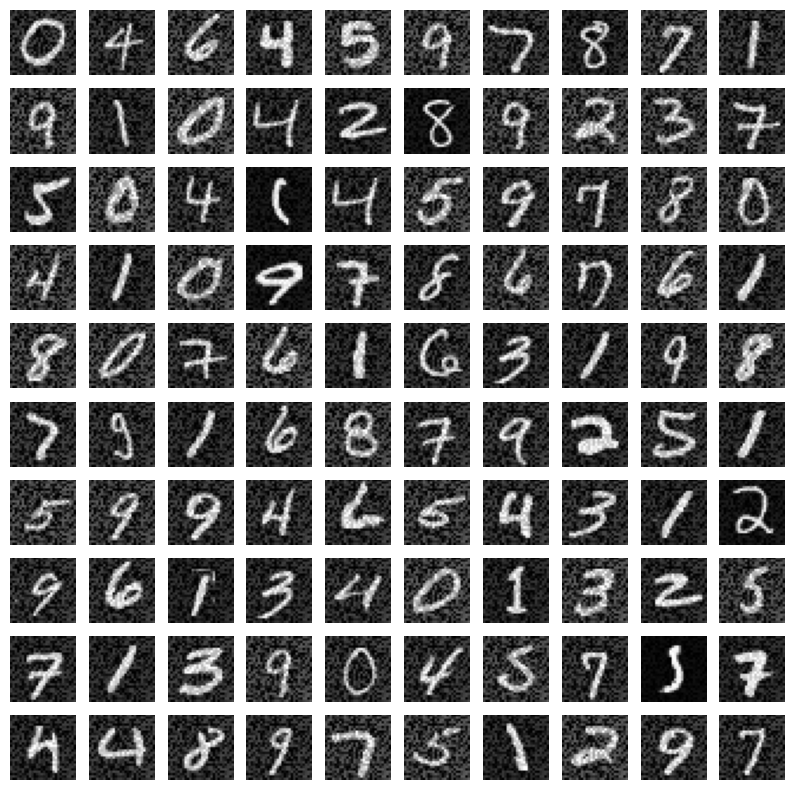

In [4]:
import matplotlib.pyplot as plt

nrows = 10
ncols = 10

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
for i in range(nrows):
    for j in range(ncols):
        axes[i, j].imshow(fake_points[i*ncols+j].reshape(28, 28), cmap='gray')
        axes[i, j].axis('off')  
plt.show()

In [5]:
bisect.print_summary()

Hidden Outlier Generation Method Object

Outlier detection method used: LOF
Synthetic HO generation method employed: multi_bisection.

Database summary:

* Number of features: 784
* Total number of data points: 1000
* Total amount of synthetic data generated: 100
	...of which hidden outliers: 100
* Number of H1 outliers: 100
* Number of H2 outliers: 0.

Total execution time: 17.423654794692993.
